In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [488]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [489]:
import matplotlib.style as style

In [490]:
df = pd.read_csv('result_data.csv',index_col=0)

In [491]:
df.shape

(509, 74)

In [492]:
df.columns

Index(['Player', 'Birthday', 'Total_Height_in', 'Weight', 'Yrs_Played_College',
       'GP_College', 'MPG_College', 'FGM_College', 'FGA_College',
       'FG_Perc_College', '3PM_College', '3PA_College', '3P_Perc_College',
       'FTM_College', 'FTA_College', 'FT_Perc_College', 'TOV_College',
       'PF_College', 'ORB_College', 'DRB_College', 'RPG_College',
       'APG_College', 'SPG_College', 'BPG_College', 'PPG_College', 'College',
       'Total_BPM_NBA', 'Rookie_Age', 'Position', 'GP_Rookie',
       'MP_Total_Rookie', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS_Rookie',
       'WS_per_48_Rookie', 'OBPM', 'DBPM', 'BPM_Rookie', 'VORP_Rookie',
       'College_above_5', 'College_adj', 'Bad',
       'Georgia Institute of Technology', 'Indiana University',
       'Stanford University', 'University of Florida',
       'University of Illinois at Urbana-Champaign', 'University of Kansas',
       'University of Memphis', 

In [493]:
X = df.loc[:,[#'Total_Height_in',
 #'Weight',
 'Yrs_Played_College',
 'FG_Perc_College',
 'FT_Perc_College',
 'RPG_College',
 'APG_College',
 'SPG_College',
 'BPG_College',
 'PPG_College',
 'Rookie_Age',
 'Georgia Institute of Technology',
 'Indiana University',
 'Stanford University',
 'University of Florida',
 'University of Illinois at Urbana-Champaign',
 'University of Kansas',
 'University of Memphis',
 'University of North Carolina',
 'University of Pittsburgh',
 'University of Washington',
 'BPM_top3',
 'BPM_top5',
 'BPM_top7',
 'BPM_top13',
 'top3/top5',
 'top3/top7',]] 
 #'top3/top13',]]
 #'top5/top13',]]
 #'top7/top13']]

y = df['BPM_Rookie']

# Standardize Data

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [504]:
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [505]:
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

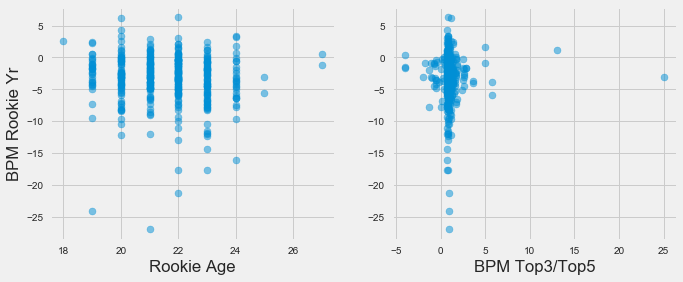

In [506]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train['Rookie_Age'],y_train, alpha = .5)
ax[0].set_xlabel('Rookie Age')
ax[0].set_ylabel('BPM Rookie Yr')

ax[1].scatter(X_train['top3/top5'],y_train, alpha = .5)
ax[1].set_xlabel('BPM Top3/Top5')

# Multiple Linear Regression

In [507]:
lr_model1 = LinearRegression()
lr_model1.fit(X_tr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [508]:
list(zip(X_train.columns,lr_model1.coef_))

[('Yrs_Played_College', 0.56853081692613083),
 ('FG_Perc_College', 0.61467078480562631),
 ('FT_Perc_College', 0.30723760810495848),
 ('RPG_College', 0.69279061915306861),
 ('APG_College', 0.48806377556909841),
 ('SPG_College', 1.087618177500735),
 ('BPG_College', 0.4037017279166728),
 ('PPG_College', -0.61525314813702081),
 ('Rookie_Age', -0.51573662045809343),
 ('Georgia Institute of Technology', 0.10165584427104399),
 ('Indiana University', 0.060428232684091032),
 ('Stanford University', 0.27717296512669987),
 ('University of Florida', 0.19737941981503213),
 ('University of Illinois at Urbana-Champaign', 0.14587458827714428),
 ('University of Kansas', 0.10381907834086057),
 ('University of Memphis', 0.041938602788586077),
 ('University of North Carolina', 0.16915224418039942),
 ('University of Pittsburgh', 0.20198887413093997),
 ('University of Washington', 0.18630888609075341),
 ('BPM_top3', -0.47665887641854443),
 ('BPM_top5', 1.5251061235319201),
 ('BPM_top7', -2.539553736589319),

In [509]:
lr_test_pred1 = lr_model1.predict(X_te)

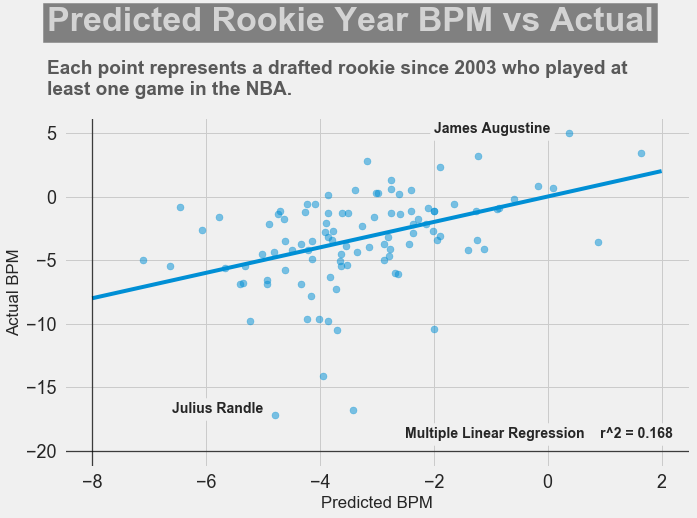

In [510]:
## Plot predicted vs actual 
style.use('fivethirtyeight')
plt.figure(figsize = (10,6))

plt.scatter(lr_test_pred1,y_test,alpha=0.5,)
plt.plot(np.linspace(-8,2,1000),np.linspace(-8,2,1000))
plt.xlabel('Predicted BPM')
plt.ylabel('Actual BPM')


plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axvline(x = -8, color = 'black', linewidth = 1.3, alpha = .7)
plt.axhline(y = -20, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x = -8.8, y = 13, s = "Predicted Rookie Year BPM vs Actual",
               fontsize = 34, weight = 'bold', alpha = .75,color = '#f0f0f0', backgroundcolor = 'grey')
plt.text(x = -8.8, y = 8, s = "Each point represents a drafted rookie since 2003 who played at\nleast one game in the NBA.",
               fontsize = 19, weight = 'bold', alpha = .75)

plt.text(x = -6.6, y = -17, s = 'Julius Randle', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
plt.text(x = -2, y = 5, s = 'James Augustine', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
plt.text(x = -2.5, y = -19, s = 'Multiple Linear Regression    r^2 = 0.168', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

In [511]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_pred1 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred1)))
print('LinReg MSE: ', mean_absolute_error(y_test,lr_test_pred1))
print('LinReg r2: ',r2_score(y_test, lr_test_pred1))

LinReg MAD:  2.4485198412285922
LinReg RMSE:  3.41450607665
LinReg MSE:  2.44851984123
LinReg r2:  0.168336511944


# Regression on Entire Data Set

In [349]:
lr_modelX = LinearRegression()
lr_modelX.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [350]:
lr_test_predX = lr_modelX.predict(X)

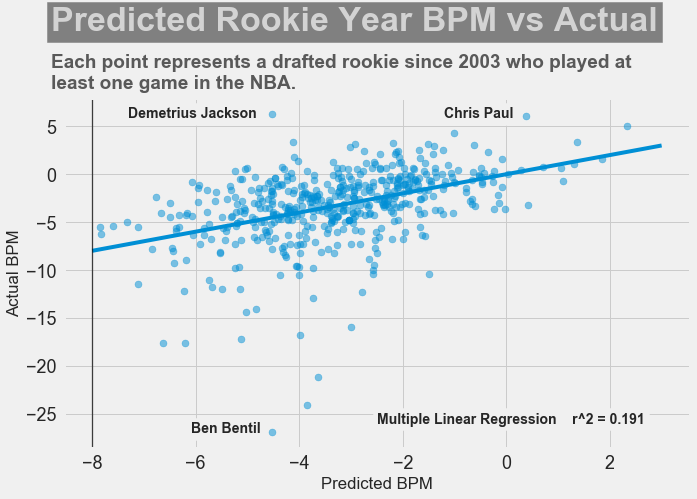

In [477]:
## Plot predicted vs actual 
style.use('fivethirtyeight')
plt.figure(figsize = (10,6))

plt.scatter(lr_test_predX,y,alpha=0.5,)
plt.plot(np.linspace(-8,3,1000),np.linspace(-8,3,1000))
plt.xlabel('Predicted BPM')
plt.ylabel('Actual BPM')


plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axvline(x = -8, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x = -8.8, y = 15, s = "Predicted Rookie Year BPM vs Actual",
               fontsize = 34, weight = 'bold', alpha = .75,color = '#f0f0f0', backgroundcolor = 'grey')
plt.text(x = -8.8, y = 9, s = "Each point represents a drafted rookie since 2003 who played at\nleast one game in the NBA.",
               fontsize = 19, weight = 'bold', alpha = .75)

plt.text(x = -6.1, y = -27, s = 'Ben Bentil', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
plt.text(x = -7.3, y = 5.9, s = 'Demetrius Jackson', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
plt.text(x = -1.2, y = 5.9, s = 'Chris Paul', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
plt.text(x = -2.5, y = -26, s = 'Multiple Linear Regression    r^2 = 0.191', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

In [352]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_predX - y)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y, lr_test_predX)))
print('LinReg MSE: ', mean_absolute_error(y,lr_test_predX))
print('LinReg r2: ',r2_score(y, lr_test_predX))

LinReg MAD:  2.3414902048937374
LinReg RMSE:  3.40331340208
LinReg MSE:  2.34149020489
LinReg r2:  0.19146405421


# LassoCV

In [353]:
alphavec = 10**np.linspace(-3,9,27)

In [354]:
lr_model2 = LassoCV(alphas = alphavec, cv=5)
lr_model2.fit(X_tr,y_train)

print('alpha: ',lr_model2.alpha_)
print('cv: ',lr_model2.cv)

alpha:  0.0242446201708
cv:  5


In [355]:
lr_model3 = Lasso(alpha=0.01)
lr_model3.fit(X_tr,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [356]:
list(zip(X_train.columns,lr_model3.coef_))

[('Yrs_Played_College', 0.53971797382086717),
 ('FG_Perc_College', 0.5953771644939061),
 ('FT_Perc_College', 0.28081306853585181),
 ('RPG_College', 0.68416474829219742),
 ('APG_College', 0.47742840207283227),
 ('SPG_College', 1.0616815734583647),
 ('BPG_College', 0.37826184860164075),
 ('PPG_College', -0.5918458755467344),
 ('Rookie_Age', -0.49113670895159572),
 ('Georgia Institute of Technology', 0.096731419723166498),
 ('Indiana University', 0.050618853113416261),
 ('Stanford University', 0.26433287784716647),
 ('University of Florida', 0.18305564414788161),
 ('University of Illinois at Urbana-Champaign', 0.14126062482307783),
 ('University of Kansas', 0.10156045117885974),
 ('University of Memphis', 0.024533270106040742),
 ('University of North Carolina', 0.15732207700580647),
 ('University of Pittsburgh', 0.18974891239413363),
 ('University of Washington', 0.16621747951444177),
 ('BPM_top3', -0.0),
 ('BPM_top5', -0.0),
 ('BPM_top7', -1.242738312821787),
 ('BPM_top13', 1.19034193531

In [357]:
lr_test_pred2 = lr_model3.predict(X_te)

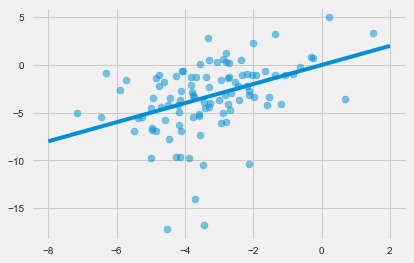

In [358]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred2,y_test,alpha=0.5)
plt.plot(np.linspace(-8,2,1000),np.linspace(-8,2,1000))

In [359]:
print('LassoReg MAD: ',np.mean(np.abs(lr_test_pred2 - y_test)))
print('LassoReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred2)))
print('LassoReg MSE: ', mean_absolute_error(y_test,lr_test_pred2))
print('LassoReg r2: ',r2_score(y_test, lr_test_pred2))

LassoReg MAD:  2.448321875853369
LassoReg RMSE:  3.42145454119
LassoReg MSE:  2.44832187585
LassoReg r2:  0.164948224448


# Ridge

In [360]:
lr_model3 = RidgeCV(alphas = alphavec, cv=5)
lr_model3.fit(X_tr,y_train)

print('alpha: ',lr_model3.alpha_)
print('cv: ',lr_model3.cv)

alpha:  41.246263829
cv:  5


In [472]:
lr_model4 = Ridge(alpha=10)#lr_model3.alpha_)
lr_model4.fit(X_tr,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [473]:
list(zip(X_train.columns,lr_model4.coef_))

[('Total_Height_in', 0.53055420324408797),
 ('Weight', 0.5766023507247553),
 ('Yrs_Played_College', 0.27100667386679689),
 ('FG_Perc_College', 0.67035803850470665),
 ('FT_Perc_College', 0.48212996378133782),
 ('RPG_College', 1.0400033944472988),
 ('APG_College', 0.38806647369087627),
 ('SPG_College', -0.57511323260562486),
 ('BPG_College', -0.48936260772288809),
 ('PPG_College', 0.10170544713719594),
 ('Rookie_Age', 0.061800177422067289),
 ('College_BPM', 0.27301325869183707),
 ('BPM_top3', 0.19066471584309275),
 ('BPM_top5', 0.15246533618658387),
 ('BPM_top7', 0.1143757810291678),
 ('BPM_top13', 0.03581881055668517),
 ('top3/top5', 0.16591578983634481),
 ('top3/top7', 0.19771467884271632)]

In [474]:
lr_test_pred3 = lr_model4.predict(X_te)

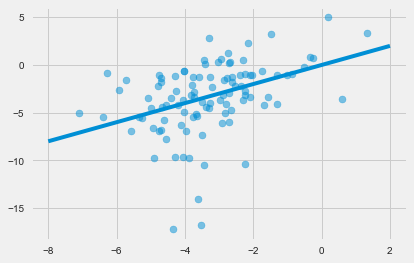

In [475]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred3,y_test,alpha=0.5)
plt.plot(np.linspace(-8,2,1000),np.linspace(-8,2,1000))

In [476]:
print('RidgeReg MAD: ',np.mean(np.abs(lr_test_pred3 - y_test)))
print('RidgeReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred3)))
print('RidgeReg MSE: ', mean_absolute_error(y_test,lr_test_pred3))
print('RidgeReg r2: ',r2_score(y_test, lr_test_pred3))

RidgeReg MAD:  2.4513803656649826
RidgeReg RMSE:  3.42863462424
RidgeReg MSE:  2.45138036566
RidgeReg r2:  0.161439756222


# Elasticnet

In [366]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Elasticnet


/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

[mean: 0.06550, std: 0.06920, params: {'alpha': 0.0001, 'l1_ratio': 0.0},
 mean: 0.06537, std: 0.06921, params: {'alpha': 0.0001, 'l1_ratio': 0.25},
 mean: 0.06523, std: 0.06922, params: {'alpha': 0.0001, 'l1_ratio': 0.5},
 mean: 0.06508, std: 0.06923, params: {'alpha': 0.0001, 'l1_ratio': 0.75},
 mean: 0.06599, std: 0.06913, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.0},
 mean: 0.06578, std: 0.06914, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.25},
 mean: 0.06556, std: 0.06915, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.5},
 mean: 0.06533, std: 0.06917, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.75},
 mean: 0.06673, std: 0.06903, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.0},
 mean: 0.06641, std: 0.06904, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.25},
 mean: 0.06608, std: 0.06906, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.5},
 mean: 0.06573, std: 0.06908, params: {'alpha': 0.0002573512700016909

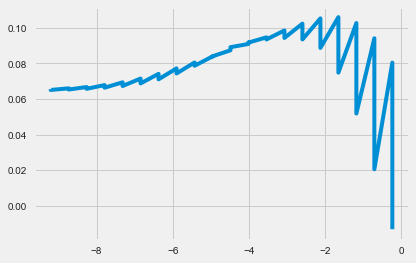

In [483]:
print("Elasticnet")
params = {
    "alpha": np.logspace(-4, -.1, 20),
    "l1_ratio": np.arange(0,1,0.25)
}

grid_est = GridSearchCV(ElasticNet(), param_grid=params, cv=kfold)
grid_est.fit(X_tr, y_train)
df_en = pd.DataFrame(grid_est.grid_scores_)
df_en["alpha"] = df_en.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df_en.alpha), df_en.mean_validation_score)
grid_est.grid_scores_

In [368]:
grid_est.best_estimator_

ElasticNet(alpha=0.19240241827602392, copy_X=True, fit_intercept=True,
      l1_ratio=0.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [369]:
lr_model5 = ElasticNet(alpha=0.1, l1_ratio=0)
lr_model5.fit(X_tr,y_train)

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [479]:
list(zip(X_train.columns,lr_model5.coef_))

[('Total_Height_in', 0.44621804614627048),
 ('Weight', 0.48368179643281189),
 ('Yrs_Played_College', 0.16409456327000191),
 ('FG_Perc_College', 0.58159322063129737),
 ('FT_Perc_College', 0.42979917331590795),
 ('RPG_College', 0.93077094128255411),
 ('APG_College', 0.36388989488253237),
 ('SPG_College', -0.4560137779139673),
 ('BPG_College', -0.4186088035450653),
 ('PPG_College', 0.083698945462539392),
 ('Rookie_Age', 0.05524090478432879),
 ('College_BPM', 0.25874748532658753),
 ('BPM_top3', 0.17924778020383267),
 ('BPM_top5', 0.15072161738345458),
 ('BPM_top7', 0.11651169686381162),
 ('BPM_top13', 0.025822081189939519),
 ('top3/top5', 0.15361703547491304),
 ('top3/top7', 0.17943991154584146)]

In [480]:
lr_test_pred4 = lr_model5.predict(X_te)

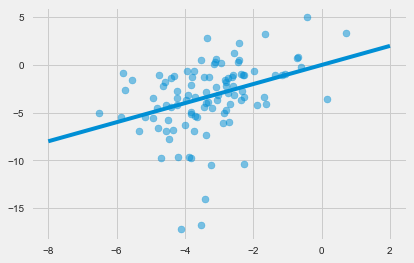

In [481]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred4,y_test,alpha=0.5)
plt.plot(np.linspace(-8,2,1000),np.linspace(-8,2,1000))

In [482]:
print('ElasReg MAD: ',np.mean(np.abs(lr_test_pred4 - y_test)))
print('ElasReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred4)))
print('ElasReg MSE: ', mean_absolute_error(y_test,lr_test_pred4))
print('ElasReg r2: ',r2_score(y_test, lr_test_pred4))

ElasReg MAD:  2.471304849630792
ElasReg RMSE:  3.45870893141
ElasReg MSE:  2.47130484963
ElasReg r2:  0.146664356672


# Random Forest

In [374]:
sorted_BPM = df.sort_values(['BPM_Rookie'], ascending=False)

In [375]:
# top colleges by number of drafted NBA players
list(sorted_BPM.groupby(['College']).count()['BPM_Rookie'].sort_values(ascending=False).head(10).index)

['University of Kentucky',
 'Duke University',
 'University of California, Los Angeles',
 'University of Kansas',
 'University of North Carolina',
 'University of Arizona',
 'University of Texas at Austin',
 'University of Connecticut',
 'Syracuse University',
 'University of Florida']

In [376]:
df_college = df.groupby(['College']).mean().sort_values(by='BPM_Rookie',ascending=False)

In [377]:
# top colleges by rookie BPM
good_colleges = ['Georgia Institute of Technology',
 'Indiana University',
 'Stanford University',
 'University of Florida',
 'University of Illinois at Urbana-Champaign',
 'University of Kansas',
 'University of Memphis',
 'University of North Carolina',
 'University of Pittsburgh',
 'University of Washington']

In [378]:
BPM_Rookie = list(df_college.filter(items=good_colleges,axis=0)['BPM_Rookie'])

In [379]:
colleges_BPM = list(zip(good_colleges,BPM_Rookie))

In [380]:
colleges_BPM.sort(key=lambda x: x[1])

In [381]:
colleges_BPM

[('University of Memphis', -2.5777777777777775),
 ('University of Washington', -2.541666666666667),
 ('University of North Carolina', -2.5294117647058822),
 ('Stanford University', -2.3500000000000001),
 ('University of Kansas', -2.3333333333333339),
 ('University of Pittsburgh', -1.9333333333333336),
 ('Indiana University', -1.9200000000000004),
 ('Georgia Institute of Technology', -1.6199999999999999),
 ('University of Florida', -1.2583333333333335),
 ('University of Illinois at Urbana-Champaign', -0.75)]

In [382]:
rank1 = [i[0] for i in colleges_BPM]

In [383]:
a = dict(enumerate(rank1,1))

In [384]:
res = dict (zip(a.values(),a.keys()))

In [385]:
res

{'Georgia Institute of Technology': 8,
 'Indiana University': 7,
 'Stanford University': 4,
 'University of Florida': 9,
 'University of Illinois at Urbana-Champaign': 10,
 'University of Kansas': 5,
 'University of Memphis': 1,
 'University of North Carolina': 3,
 'University of Pittsburgh': 6,
 'University of Washington': 2}

In [386]:
def CollegeBPM(college):
    '''
    Returns a ranking from 0-10 based on what college the player played for. Player receives a 0 if they did
    not play for the top 10 colleges based on BPM average.
    '''
    if college in good_colleges:
        return res[college]
    else:
        return 0

In [387]:
df['College_BPM'] = df['College'].apply(CollegeBPM)

In [388]:
feature_columns = ['Total_Height_in',
 'Weight',
 'Yrs_Played_College',
 'FG_Perc_College',
 'FT_Perc_College',
 'RPG_College',
 'APG_College',
 'SPG_College',
 'BPG_College',
 'PPG_College',
 'Rookie_Age',
 'College_BPM',
 'BPM_top3',
 'BPM_top5',
 'BPM_top7',
 'BPM_top13',
 'top3/top5',
 'top3/top7',]

In [420]:
X = df.loc[:,feature_columns]
y = df.loc[:,"BPM_Rookie"]

In [421]:
X_train, X_test, y_train, y_testrf = train_test_split(X, y, test_size=0.2,random_state=42)

# Forest 1

In [392]:
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=9, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [393]:
rf_test_pred1 = rfmodel1.predict(X_test)

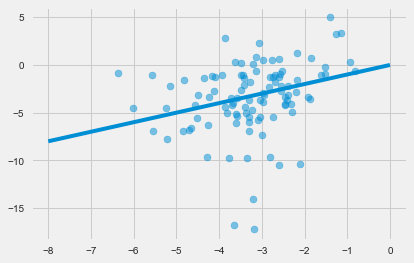

In [484]:
#Plot actual vs predicted

plt.scatter(rf_test_pred1,y_testrf,alpha=.5)
plt.plot(np.linspace(-8,0,1000),np.linspace(-8,0,1000))

In [395]:
list(zip(X_train.columns,rfmodel1.feature_importances_))

[('Total_Height_in', 0.033073070309728225),
 ('Weight', 0.04463838669743974),
 ('Yrs_Played_College', 0.011233176597726239),
 ('FG_Perc_College', 0.092341950420620197),
 ('FT_Perc_College', 0.055059258427671003),
 ('RPG_College', 0.079875180062566081),
 ('APG_College', 0.098649178438206281),
 ('SPG_College', 0.11429390701000072),
 ('BPG_College', 0.062470746232222915),
 ('PPG_College', 0.076651764158986585),
 ('Rookie_Age', 0.034188295248780198),
 ('College_BPM', 0.008565584193588131),
 ('BPM_top3', 0.050367851058289642),
 ('BPM_top5', 0.05472528542425921),
 ('BPM_top7', 0.042574260792567035),
 ('BPM_top13', 0.067305098932863461),
 ('top3/top5', 0.034587938124709304),
 ('top3/top7', 0.039399067869775359)]

In [396]:
print('RandomForest1 MAD: ',np.mean(np.abs(rf_test_pred1 - y_testrf)))
print('RandomForest1 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred1)))
print('RandomForest1 MSE: ', mean_absolute_error(y_testrf,rf_test_pred1))
print('RandomForest1 r2: ',r2_score(y_testrf, rf_test_pred1))

RandomForest1 MAD:  2.5840308667504384
RandomForest1 RMSE:  3.60807065769
RandomForest1 MSE:  2.58403086675
RandomForest1 r2:  0.0713716818715


# Forest 2

In [397]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1, max_features=9, n_jobs=-1)
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [398]:
rf_test_pred2 = rfmodel2.predict(X_test)

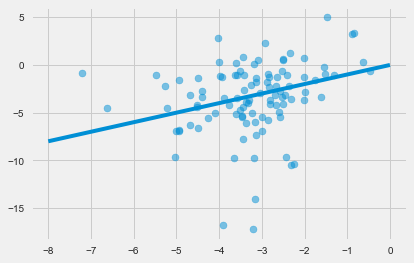

In [485]:
#Plot actual vs predicted

plt.scatter(rf_test_pred2,y_testrf,alpha=.5)
plt.plot(np.linspace(-8,0,1000),np.linspace(-8,0,1000))

In [400]:
list(zip(X_train.columns,rfmodel2.feature_importances_))

[('Total_Height_in', 0.03829042545214803),
 ('Weight', 0.087443839719331853),
 ('Yrs_Played_College', 0.014271628840042521),
 ('FG_Perc_College', 0.086307713964138888),
 ('FT_Perc_College', 0.060579487990803343),
 ('RPG_College', 0.070548386188091936),
 ('APG_College', 0.087629588359695615),
 ('SPG_College', 0.092417305544531009),
 ('BPG_College', 0.059022902989296605),
 ('PPG_College', 0.075874473280441654),
 ('Rookie_Age', 0.036305030350018426),
 ('College_BPM', 0.010211157315373857),
 ('BPM_top3', 0.05380572818303344),
 ('BPM_top5', 0.05637155152259065),
 ('BPM_top7', 0.042604005382281339),
 ('BPM_top13', 0.059314105875716568),
 ('top3/top5', 0.034642196750176914),
 ('top3/top7', 0.034360472292287086)]

In [403]:
print('RandomForest2 MAD: ',np.mean(np.abs(rf_test_pred2 - y_testrf)))
print('RandomForest2 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred2)))
print('RandomForest2 MSE: ', mean_absolute_error(y_testrf,rf_test_pred2))
print('RandomForest2 r2: ',r2_score(y_testrf, rf_test_pred2))

RandomForest2 MAD:  2.6037598039215695
RandomForest2 RMSE:  3.64068081493
RandomForest2 MSE:  2.60375980392
RandomForest2 r2:  0.0545097256145


# Forest 3

In [404]:
rfmodel3 = RandomForestRegressor(n_estimators = 600, min_samples_leaf=1, max_features='sqrt', n_jobs=-1)
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [405]:
rf_test_pred3 = rfmodel3.predict(X_test)

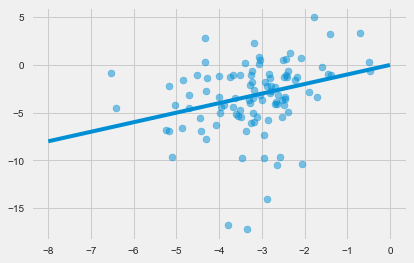

In [486]:
#Plot actual vs predicted

plt.scatter(rf_test_pred3,y_testrf,alpha=.5)
plt.plot(np.linspace(-8,0,1000),np.linspace(-8,0,1000))

In [407]:
list(zip(X_train.columns,rfmodel3.feature_importances_))

[('Total_Height_in', 0.042631021080917417),
 ('Weight', 0.073424961871677755),
 ('Yrs_Played_College', 0.017099092492982252),
 ('FG_Perc_College', 0.074082521362106982),
 ('FT_Perc_College', 0.058275119827430701),
 ('RPG_College', 0.067052589751974867),
 ('APG_College', 0.08380227586113928),
 ('SPG_College', 0.086025116565103768),
 ('BPG_College', 0.058476079633569746),
 ('PPG_College', 0.065972006497391156),
 ('Rookie_Age', 0.036812051665900479),
 ('College_BPM', 0.011466951270038807),
 ('BPM_top3', 0.059654784632707847),
 ('BPM_top5', 0.057452327877918506),
 ('BPM_top7', 0.054475901195234648),
 ('BPM_top13', 0.065351440012469661),
 ('top3/top5', 0.044114531994099829),
 ('top3/top7', 0.043831226407336263)]

In [408]:
print('RandomForest3 MAD: ',np.mean(np.abs(rf_test_pred3 - y_testrf)))
print('RandomForest3 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred3)))
print('RandomForest3 MSE: ', mean_absolute_error(y_testrf,rf_test_pred3))
print('RandomForest3 r2: ',r2_score(y_testrf, rf_test_pred3))

RandomForest3 MAD:  2.568478758169935
RandomForest3 RMSE:  3.62152693752
RandomForest3 MSE:  2.56847875817
RandomForest3 r2:  0.0644321369671


# Gradient Boosted Trees

In [461]:
gbmodel1 = GradientBoostingRegressor(n_estimators = 1000, learning_rate = .01, max_depth = 1)

In [462]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [463]:
pred_vals_gb1 = gbmodel1.predict(X_test)

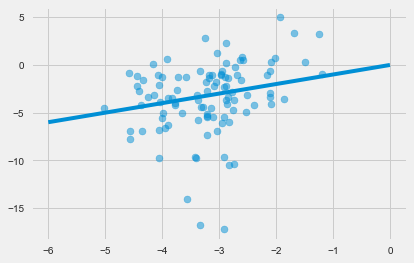

In [464]:
#Plot actual vs predicted

plt.scatter(pred_vals_gb1,y_testrf,alpha=.5)
plt.plot(np.linspace(-6,0,1000),np.linspace(-6,0,1000))

In [465]:
print('GradBoost MAD: ',np.mean(np.abs(pred_vals_gb1 - y_testrf)))
print('GradBoost RMSE: ',np.sqrt(mean_squared_error(y_testrf, pred_vals_gb1)))
print('GradBoost MSE: ', mean_absolute_error(y_testrf,pred_vals_gb1))
print('GradBoost r2: ',r2_score(y_testrf, pred_vals_gb1))

GradBoost MAD:  2.6433299893234876
GradBoost RMSE:  3.61637664287
GradBoost MSE:  2.64332998932
GradBoost r2:  0.0670912495491


# Results

In [478]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_pred1 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred1)))
print('LinReg MSE: ', mean_absolute_error(y_test,lr_test_pred1))
print('LinReg r2: ',r2_score(y_test, lr_test_pred1))
print('\n')
print('LassoReg MAD: ',np.mean(np.abs(lr_test_pred2 - y_test)))
print('LassoReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred2)))
print('LassoReg MSE: ', mean_absolute_error(y_test,lr_test_pred2))
print('LassoReg r2: ',r2_score(y_test, lr_test_pred2))
print('\n')
print('RidgeReg MAD: ',np.mean(np.abs(lr_test_pred3 - y_test)))
print('RidgeReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred3)))
print('RidgeReg MSE: ', mean_absolute_error(y_test,lr_test_pred3))
print('RidgeReg r2: ',r2_score(y_test, lr_test_pred3))
print('\n')
print('ElasReg MAD: ',np.mean(np.abs(lr_test_pred4 - y_test)))
print('ElasReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred4)))
print('ElasReg MSE: ', mean_absolute_error(y_test,lr_test_pred4))
print('ElasReg r2: ',r2_score(y_test, lr_test_pred4))
print('\n')
print('RandomForest1 MAD: ',np.mean(np.abs(rf_test_pred1 - y_testrf)))
print('RandomForest1 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred1)))
print('RandomForest1 MSE: ', mean_absolute_error(y_testrf,rf_test_pred1))
print('RandomForest1 r2: ',r2_score(y_testrf, rf_test_pred1))
print('\n')
print('RandomForest2 MAD: ',np.mean(np.abs(rf_test_pred2 - y_testrf)))
print('RandomForest2 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred2)))
print('RandomForest2 MSE: ', mean_absolute_error(y_testrf,rf_test_pred2))
print('RandomForest2 r2: ',r2_score(y_testrf, rf_test_pred2))
print('\n')
print('RandomForest3 MAD: ',np.mean(np.abs(rf_test_pred3 - y_testrf)))
print('RandomForest3 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred3)))
print('RandomForest3 MSE: ', mean_absolute_error(y_testrf,rf_test_pred3))
print('RandomForest3 r2: ',r2_score(y_testrf, rf_test_pred3))
print('\n')
print('GradBoost MAD: ',np.mean(np.abs(pred_vals_gb1 - y_testrf)))
print('GradBoost RMSE: ',np.sqrt(mean_squared_error(y_testrf, pred_vals_gb1)))
print('GradBoost MSE: ', mean_absolute_error(y_testrf,pred_vals_gb1))
print('GradBoost r2: ',r2_score(y_testrf, pred_vals_gb1))

LinReg MAD:  2.4485198412285922
LinReg RMSE:  3.41450607665
LinReg MSE:  2.44851984123
LinReg r2:  0.168336511944


LassoReg MAD:  2.448321875853369
LassoReg RMSE:  3.42145454119
LassoReg MSE:  2.44832187585
LassoReg r2:  0.164948224448


RidgeReg MAD:  2.4513803656649826
RidgeReg RMSE:  3.42863462424
RidgeReg MSE:  2.45138036566
RidgeReg r2:  0.161439756222


ElasReg MAD:  2.471304849630792
ElasReg RMSE:  3.45870893141
ElasReg MSE:  2.47130484963
ElasReg r2:  0.146664356672


RandomForest1 MAD:  2.5840308667504384
RandomForest1 RMSE:  3.60807065769
RandomForest1 MSE:  2.58403086675
RandomForest1 r2:  0.0713716818715


RandomForest2 MAD:  2.6037598039215695
RandomForest2 RMSE:  3.64068081493
RandomForest2 MSE:  2.60375980392
RandomForest2 r2:  0.0545097256145


RandomForest3 MAD:  2.568478758169935
RandomForest3 RMSE:  3.62152693752
RandomForest3 MSE:  2.56847875817
RandomForest3 r2:  0.0644321369671


GradBoost MAD:  2.6433299893234876
GradBoost RMSE:  3.61637664287
GradBoost MSE:  2.

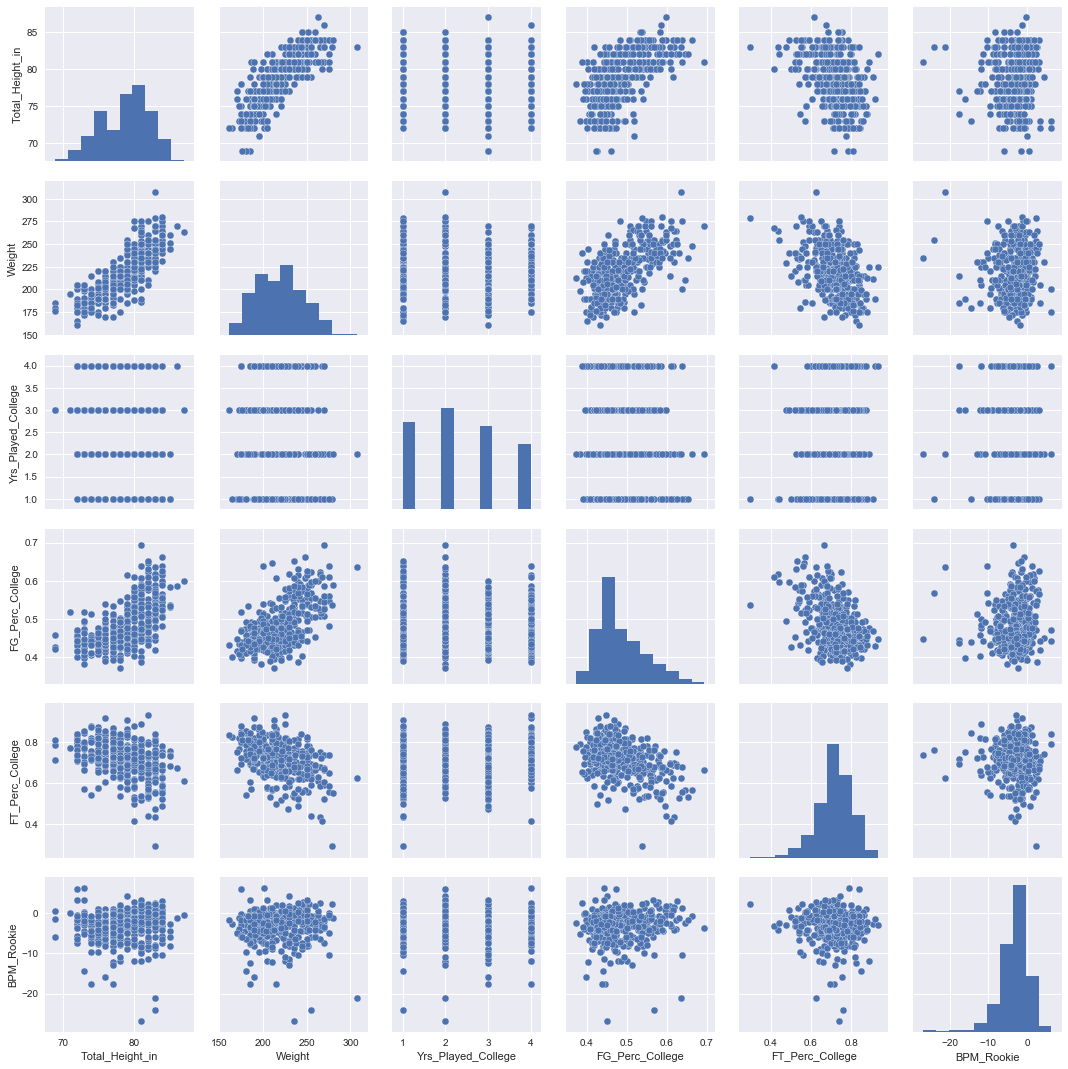

In [72]:
sns.pairplot(pd.concat([X_train.iloc[:,0:5], y_train], axis=1))